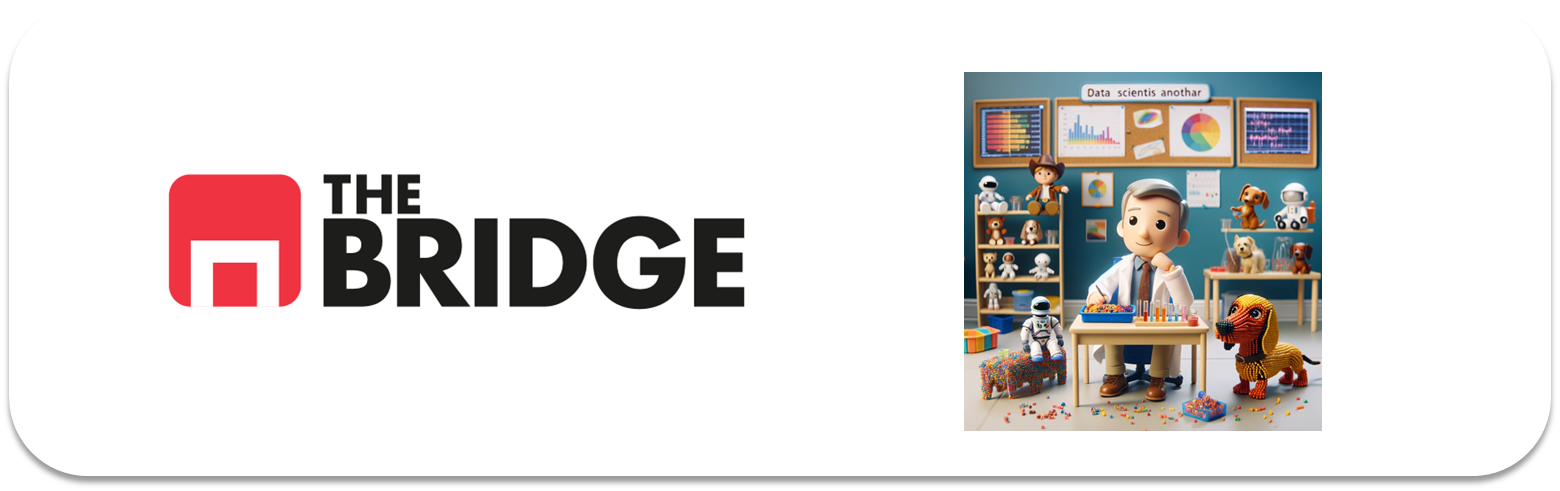

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [7]:
nulos = df_titanic.isnull().mean() * 100
nulos


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
df_titanic.drop(columns=["parch"], inplace=True)

In [9]:
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)

df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace=True)

C:\Users\javil\AppData\Local\Temp\ipykernel_16968\202665209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)
C:\Users\javil\AppData\Local\Temp\ipykernel_16968\202665209.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived   |Persona que sigue viva |
| pclass    | Categoría social |
| sex      | Género de la persona |
| age     | Edad |
| sibsp      |Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| parch      | Número de padres o hijos que viajaban con la persona |
| ticket     |Número del billete |
| fare       | Tarifa pagada |
|cabin      | Camarote |
|embarked      | Ciudad de embarque |
| class      | Valor de pclass |
| who     | Genero |
| alone      | Si viaja solo |
| age_cat      | Categoria de edad |
|embarked_cat       | inicial de la ciudad de embarque|




### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [10]:
for index, row in df_titanic.iterrows():
    if row['embarked'] == 'S':
        df_titanic.at[index, 'embarked'] = 'Southampton'
    elif row['embarked'] == 'C':
        df_titanic.at[index, 'embarked'] = 'Cherburgo'
    elif row['embarked'] == 'Q':
        df_titanic.at[index, 'embarked'] = 'Queenstown (Cobh)'

In [11]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,Southampton,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,Cherburgo,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,Southampton,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,Southampton,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,Southampton,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,23.4500,Southampton,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,Cherburgo,First,man,True,C,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [16]:
from bootcampviztools import plot_combined_graphs
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    resultados = []

    for col in df_in.columns:
        valores_unicos = df_in[col].nunique(dropna=True)
        total_valores = len(df_in[col])
        porcentaje_cardinalidad = valores_unicos / total_valores
        
        # Clasificación
        if valores_unicos == 2:
            tipo = "Binaria"
        elif valores_unicos < umbral_categoria:
            tipo = "Categórica"
        else:
            if porcentaje_cardinalidad >= umbral_continua:
                tipo = "Numerica Continua"
            else:
                tipo = "Numerica Discreta"

        resultados.append({
            "columna": col,
            "cardinalidad": valores_unicos,
            "porcentaje_cardinalidad": porcentaje_cardinalidad,
            "tipo": tipo
        })

    df_resultado = pd.DataFrame(resultados)
    return df_resultado

def calcular_cv(df, columnas):
   
    cv = df[columnas].std() / df[columnas].mean()
    return cv

In [13]:
cardinalidad(df_titanic, 10,0.9)

,columna,cardinalidad,porcentaje_cardinalidad,tipo
0,survived,2,0.002245,Binaria
1,pclass,3,0.003367,Categórica
2,sex,2,0.002245,Binaria
3,age,89,0.099888,Numerica Discreta
4,sibsp,7,0.007856,Categórica
5,fare,248,0.278339,Numerica Discreta
6,embarked,3,0.003367,Categórica
7,class,3,0.003367,Categórica
8,who,3,0.003367,Categórica
9,adult_male,2,0.002245,Binaria


### #2.1 Categóricas

(11, 2)


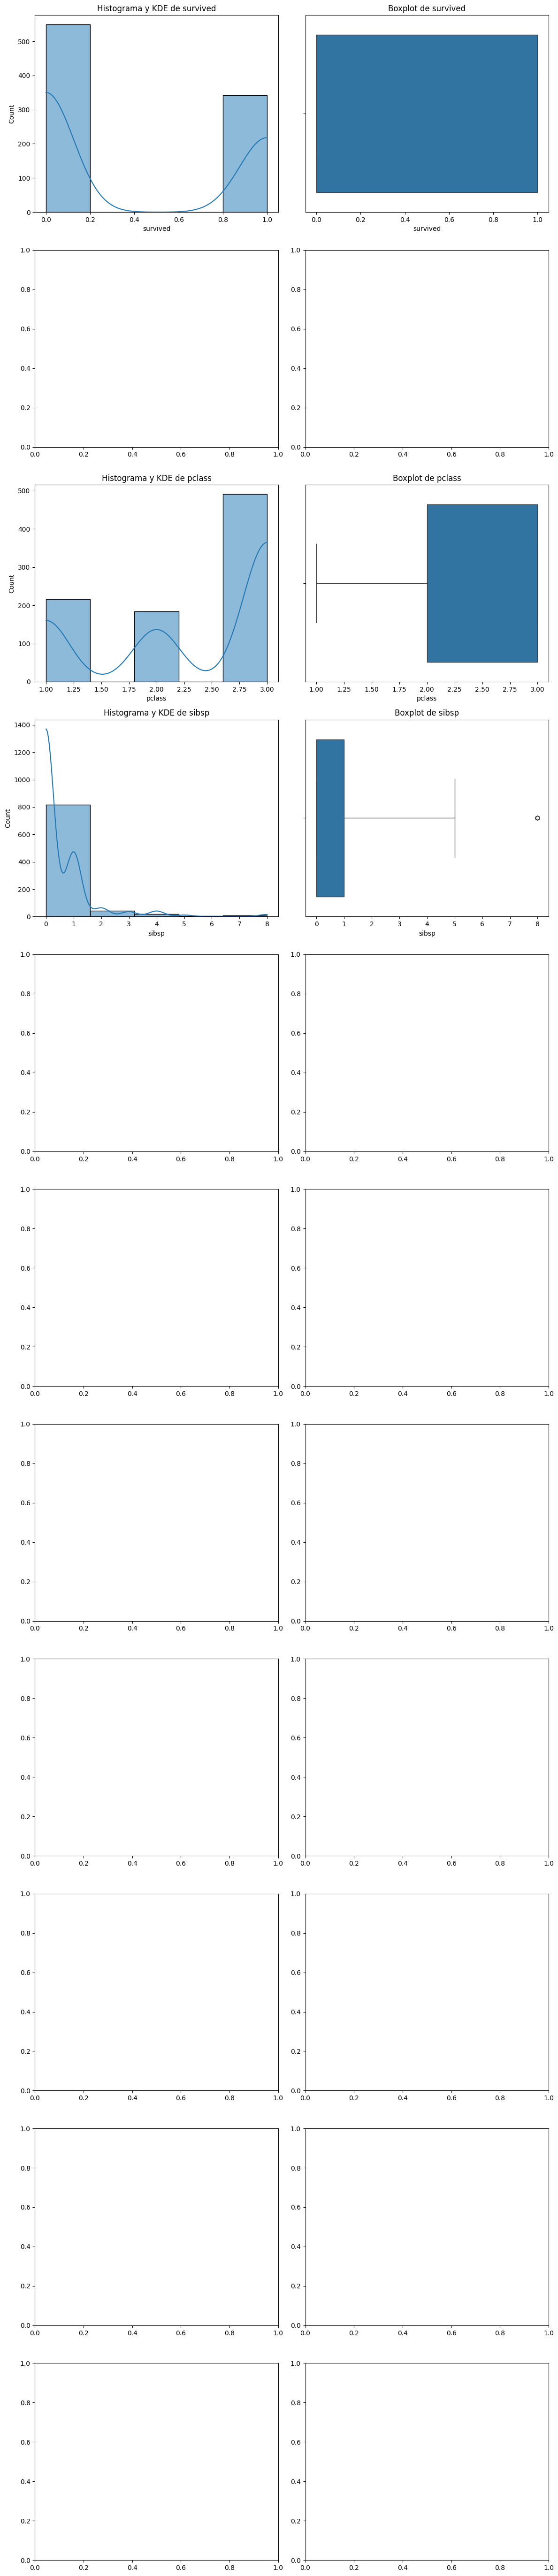

In [27]:
colcat= ["survived","sex","pclass","sibsp", "embarked","class","who","deck","embark_town","alive","alone"]
plot_combined_graphs(df_titanic,colcat,whisker_width=4, bins = 5)

### #2.2 Numéricas

In [20]:
colnum= ["age","fare", "adult_male",]
calcular_cv(df_titanic,colnum)

age           0.437791
fare          1.543073
adult_male    0.812378
dtype: float64

(3, 2)


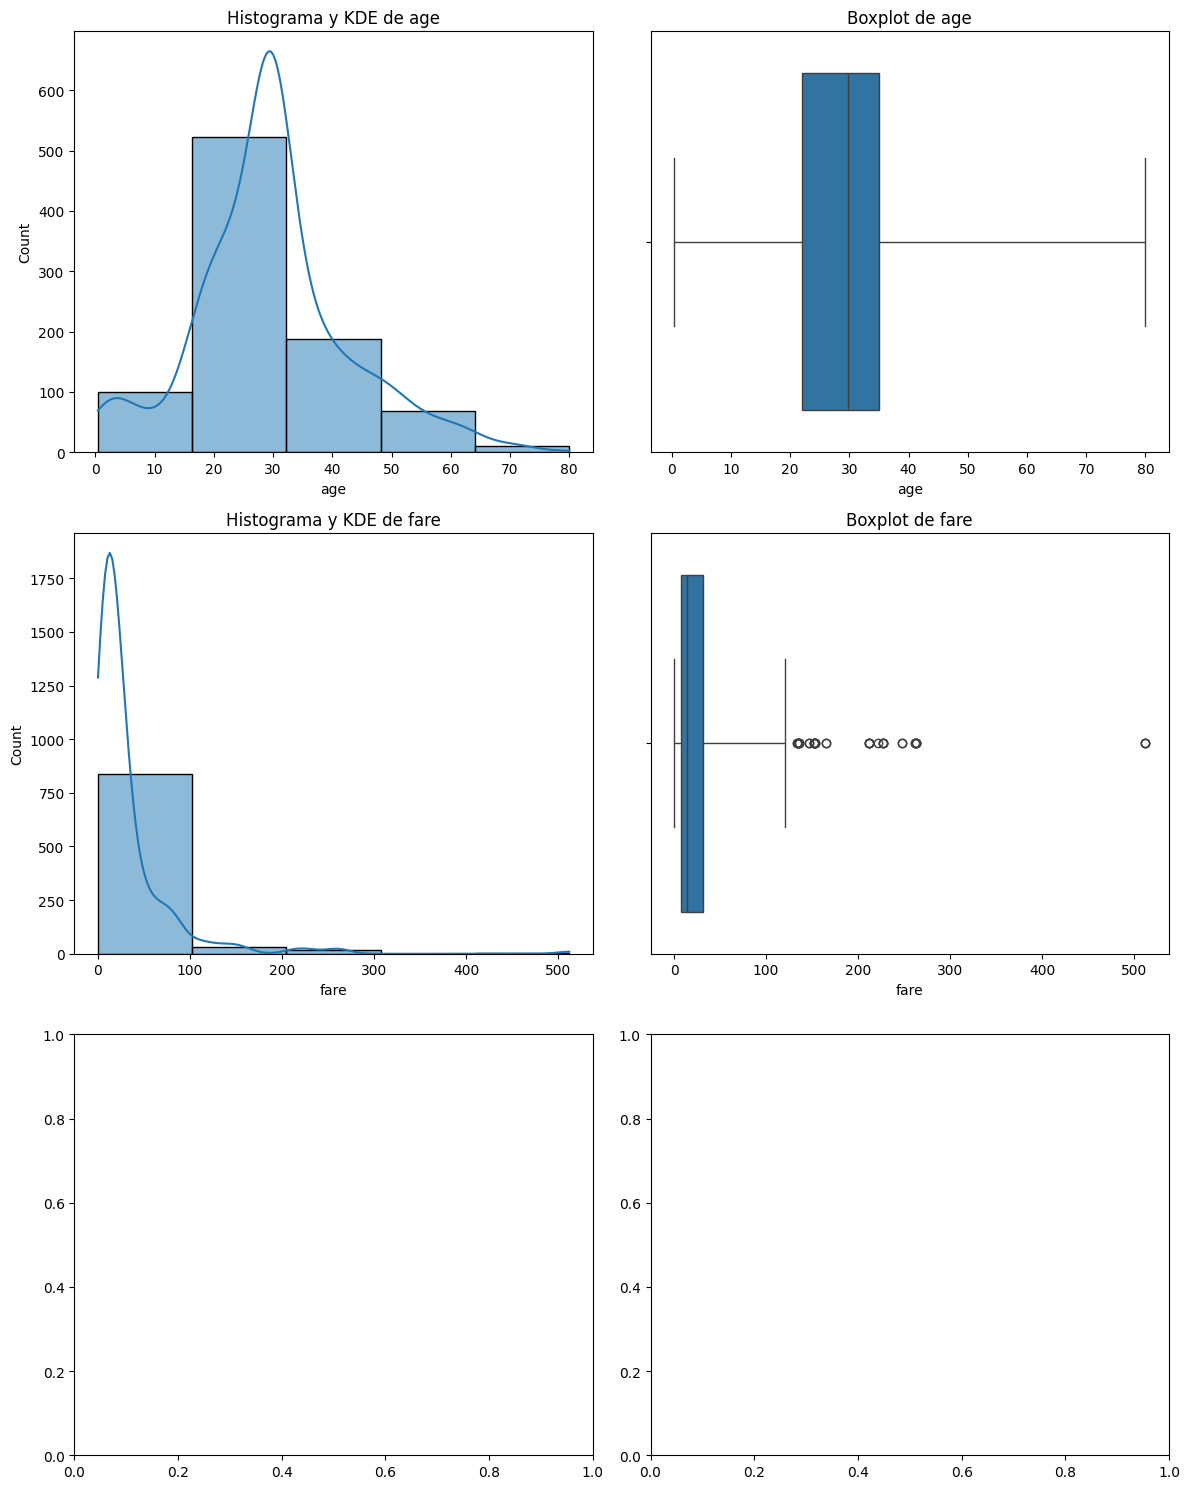

In [28]:
plot_combined_graphs(df_titanic,colnum,whisker_width=4, bins = 5)